# Box and Whisker Plots

Um box plot, às vezes chamado box-and-whisker plot, é um método de mostrar estatísticas agregadas de várias amostras de forma concisa. O objetivo do boxplot é resumir a distribuição de seus dados por meio de uma visualização do que é chamado de resumo de 5 números: os extremos - geralmente os valores mínimo e máximo, o centro, geralmente a mediana dos dados, e o primeiro e terceiros quartis de seus dados. Os quartis de seus dados os dividem em quatro baldes de tamanhos aproximadamente semelhantes e, portanto, os marcadores de primeiro e terceiro quartil - às vezes chamados de dobradiças - mostram os 50% intermediários de seus dados. Através do box plot podemos ter uma noção da ponderação dos dados em uma representação visual bastante compacta. Vamos dar uma olhada.

In [1]:
# First we'll bring in our libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Now let's create three different samples from NumPy - One for the normal distribution,
# one for random, and one from a gamma distribution. 

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

# Next, let's put those in a pandas DataFrame.
df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,normal,random,gamma
0,-2.093125,0.054381,0.874330
1,-0.352347,0.248856,2.794117
2,-0.430909,0.733453,1.994698
3,0.690681,0.654833,5.099618
4,1.490623,0.501877,1.180359
...,...,...,...
9995,1.757456,0.168274,0.242767
9996,-0.500452,0.030699,3.165910
9997,-3.242489,0.949505,3.573703
9998,0.475709,0.909800,2.570102


In [2]:
# Now we can use the pandas describe function to see some summary statistics about our data frame.
# Each row has 10,000 entries. The mean values and standard deviation vary heavily.
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.002383,0.501589,1.988248
std,0.998707,0.287904,1.401701
min,-3.421413,0.000029,0.029934
25%,-0.664285,0.251182,0.969825
50%,-0.007043,0.503997,1.687850
75%,0.663809,0.749124,2.673620
max,3.714497,0.999677,11.326514


Esta função mostra os valores mínimo e máximo e três valores percentuais diferentes. Esses valores percentuais compõem o que é chamado de intervalo interquartílico. Existem quatro trimestres diferentes dos dados. O primeiro está entre o valor mínimo e os primeiros 25% dos dados. E esse valor de 25% é chamado de primeiro quartil. O segundo trimestre de dados está entre a marca de 25% e 50% dos dados. O terceiro entre 50 e 75% dos dados. E a marca de 75% é chamada de terceiro quartil. E o dado final está entre os 75% e o máximo dos dados.

Como o desvio padrão, o intervalo interquartílico é uma medida da variabilidade dos dados. E é comum plotar isso usando um gráfico de caixa. Em um box plot, a média, ou mediana, dos dados é plotada como uma linha reta. Duas caixas são formadas, uma acima, que representa o grupo de dados de 50% a 75%, e uma abaixo, que representa o grupo de dados de 25% a 50%. Linhas finas são então desenhadas para os valores mínimo e máximo.

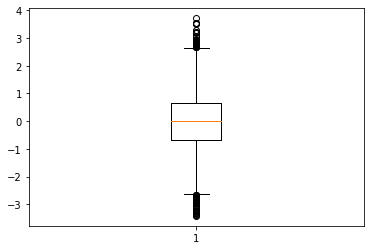

In [4]:
# To see a boxplot we just choose the column of the dataframe we are interested in and pass it
# to pyplot's boxplot function. matplotlib uses numpy arrays for data, but since pandas is built
# on top of numpy things work fluidly
plt.boxplot(df['normal']);

Você verá que matplotlib realmente imprime um monte de informações sobre artistas. Frequentemente, não queremos realmente ver isso, mas às vezes pode ser útil. Para suprimir isso, simplesmente colocamos um ponto e vírgula no final de nossa última declaração. Este é um truque do notebook Jupyter que eu realmente usei algumas vezes e não contei a você - ele suprime a impressão da última variável em uma célula. Esteja avisado, não é python padrão!

Ótimo, isso nos dá um gráfico de caixa básico. Agora vamos adicionar as outras duas amostras a ele. Infelizmente, não podemos simplesmente passar um quadro de dados pandas inteiro para matplotlib. Em vez disso, precisamos retirar cada coluna e enviá-las como uma lista de valores.

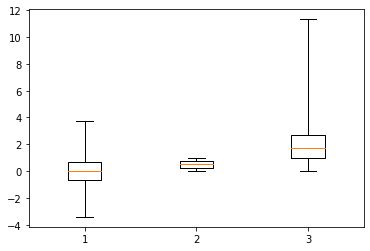

In [5]:
# plot boxplots for all three of df's columns
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100]);

Tudo bem, isso nos dá nossas três distribuições. Agora, não normalizamos a escala, então isso é um pouco instável. Mas se olharmos para a distribuição gama, por exemplo, vemos que sua cauda é muito, muito longa. Portanto, os valores máximos estão muito distantes. Vamos dar uma olhada nisso por si só em um histograma.

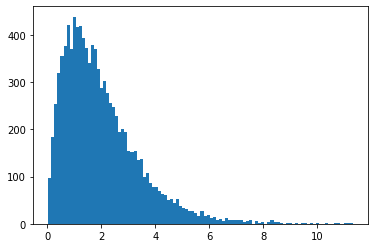

In [6]:
plt.hist(df['gamma'], bins=100);

Interessante, vemos que começa em um nível moderado, aumenta, depois cai muito mais gradualmente e realmente tem uma cauda muito longa. Vamos adicioná-lo ao nosso box plot, e vou aproveitá-lo como uma oportunidade para demonstrar algo chamado [inset axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.inset_axes.html).

Lembre-se de que temos uma figura com uma subtrama. Como não fizemos nada sofisticado com subplots, isso significa que temos apenas um objeto de eixos. Na verdade, podemos sobrepor um eixo sobre outro dentro de uma figura. Fazemos isso chamando a função `inset_axes` na figura e enviando os detalhes dos novos eixos que queremos criar. Os detalhes que enviamos são uma posição no espaço x/y e a largura e altura do novo gráfico.

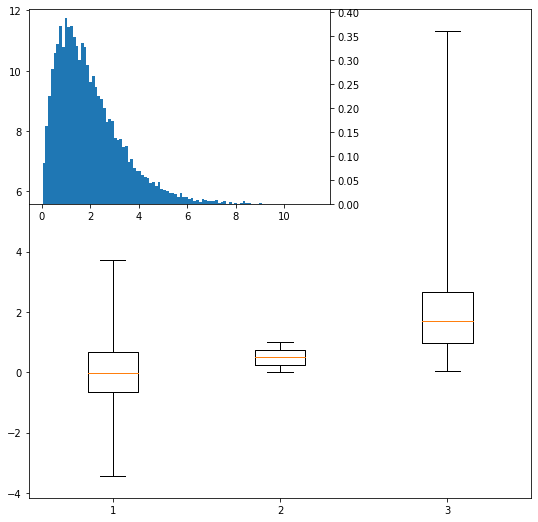

In [7]:
plt.figure(figsize=(9,9))
# Our main figure is our boxplot
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])
# Now let's plot on that axes a new axes object! This will be overlayed on
# top, and we provide a bounding box of (0,0.6) as the bottom left, and 
# (0.6,0.4) as width and height. These are ratios of the ax object
ax2 = plt.gca().inset_axes([0,0.6,0.6,0.4])
# Now we can just plot our histogram right on there
ax2.hist(df['gamma'], bins=100, density=True)
# And since the histogram will have tick labels on the left and clash with
# the main figure, we can flip them to the right
ax2.yaxis.tick_right();

Muito legal, não é? Então, em uma figura aqui temos nossos boxplots de três distribuições, e então temos uma bela imagem inserida mostrando o histograma do boxplot mais à direita.

Lembre-se novamente que cada boxplot é o nosso resumo de cinco números -- uma linha mediana em vermelho no meio, depois duas caixas de cada lado que representam 25% da população, respectivamente, depois bigodes que vão até o máximo e mínimo do dados. Este seria um ótimo momento para pausar o vídeo e brincar com o notebook, para limpar essa figura adicionando títulos, legendas e coisas do gênero. Como você deixaria claro para o leitor que o histograma inserido é sobre o boxplot na extrema direita, por exemplo?

Agora, muitas vezes queremos olhar para um boxplot não vendo os valores máximos e mínimos, mas enfatizando os valores discrepantes.
Como os outliers são detectados realmente depende, e existem vários mecanismos para determinar se uma observação é um outlier ou não. Se olharmos para a documentação, porém, o padrão para matplotlib é que outliers são todos os pontos de dados que são maiores ou menores que a distância entre a dobradiça (parte inferior ou superior da caixa, ou primeiro e terceiro quartil) e 1,5 * o intervalo interquartil (IQR). A faixa interquartil é a distância entre as duas dobradiças, que captura 50% de nossos dados. Portanto, se omitirmos o parâmetro `whis` para a chamada boxplot, veremos os outliers usando esse método plotados.

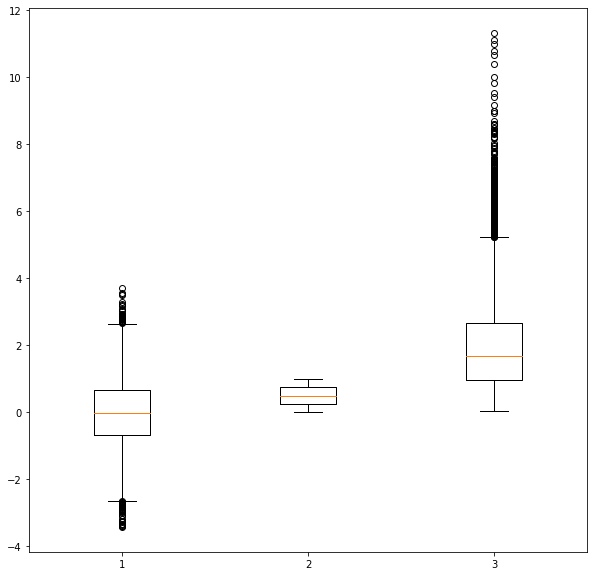

In [8]:
# Nice big figure
plt.figure(figsize=(10,10))
# Now with outliers
plt.boxplot([ df['normal'], df['random'], df['gamma'] ]);

Cada círculo no boxplot é uma única observação discrepante. O gráfico de caixa é um dos gráficos mais comuns que você pode usar como cientista de dados, e o matplotlib tem suporte significativo para diferentes tipos de gráficos de caixa. Aqui, a documentação do matplotlib é fundamental. Você pode encontrar links nos recursos do curso para a API, que descreve a funcionalidade do box plot.

Tenho mais um gráfico para mostrar esta semana - um histograma bidimensional, mais conhecido como mapa de calor. Em seguida, veremos mais alguns recursos avançados do matplotlib.